# Welcome to week 3, part 1

Here, you're going to learn about K-Means clustering.

## What is k-means clustering?

...

## The essentials

Let's begin by importing all of the packages we need, as well as making some sample data to work on.

We'll import all our usual packages for data manipulation and visualization - making sure to include %matplotlib inline when we're working in a notebook - as well as make_blobs(), a function that simply returns a set of ordered pairs, as well their corresponding label.

In [213]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from IPython.display import display
from sklearn.datasets.samples_generator import make_blobs

In [214]:
from scipy.spatial.distance import euclidean

So we set pairs to take the ordered pairs from the make_blobs() function, and labels will receive the value for the cluster each point is assigned to. Let's also throw them into a DataFrame, and preview our data using head().

Note that the point of K-Means is that we don't know our clusters! So in a way, we're cheating here. Really, the reason we're using make_blobs() is so that at the end, we can go back and check how accurate we were at clustering our data.

In [215]:
pairs, labels = make_blobs(n_samples=100, cluster_std=0.25, centers=3, n_features=2, random_state=0)
df = pd.DataFrame(pairs, columns=['X','Y'])
df['Cluster'] = labels
display(df.head(10))

,X,Y,Cluster
0,2.199415,0.845589,1
1,0.752403,4.400513,0
2,2.292081,0.858911,1
3,0.572796,4.250602,0
4,0.714132,3.948783,0
5,0.889292,4.342875,0
6,-1.813771,2.808427,2
7,-1.289549,2.939770,2
8,2.223341,0.999529,1
9,0.817690,4.213102,0


## Visualizing our data

Perfect. So now we know what our data looks like numerically. What about visualy? Let's plot our data to get a feel for what it looks like.

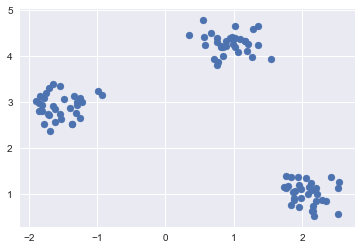

In [216]:
plt.scatter(df['X'], df['Y'])

Looking good. As we can see, there are three distinct clusters in our data. Remember, we're trying to find the centroids of these clusters. Let's take a rough look at where they are. We'll add an axis to our plot, and then add a few circles that are roughly estimating where these centroids are. 

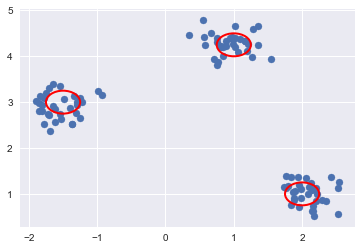

In [217]:
plt.scatter(df['X'], df['Y'])
ax = plt.gca() #add an axis

guesses = np.array([np.array([-1.5, 3]), np.array([1, 4.25]), np.array([2, 1])]) #coordinates for our guesses

ax.add_artist(plt.Circle(guesses[0], 0.25, fill=False, lw=2, color='red')) #rough guess for centroid one
ax.add_artist(plt.Circle(guesses[1], 0.25, fill=False, lw=2, color='red')) #centroid two
ax.add_artist(plt.Circle(guesses[2], 0.25, fill=False, lw=2, color='red')) #centroid three

## Analyzing our data

Now we can get to work on our clustering. First, let's get rid of our cluster labels, and take only our data points. Let's lose our cluster labels - which we aren't supposed to know! - and take a peak at what we have for our ordered pairs.

In [218]:
points = df[['X','Y']]
display(points.head(3))

,X,Y
0,2.199415,0.845589
1,0.752403,4.400513
2,2.292081,0.858911


So now we have all of our ordered pairs. We'll begin our clustering by taking three random elements from our set of points. In order to take a random sample from a DataFrame, we'll use pandas' DataFrame.sample(). We'll take just the values, giving us an array and making them easier to work with.

In [219]:
def choose_centroids(points, k):
    return points.sample(k).values

centroids = choose_centroids(points, 3)
display(centroids)

array([[ 1.054537  ,  4.09026339],
       [-1.71179476,  3.30363591],
       [ 2.34996241,  0.85268245]])

Let's plot our randomly chosen centroids, and see how close they are...

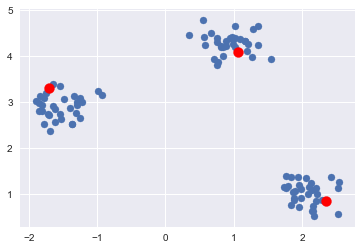

In [220]:
plt.scatter(points.iloc[:, 0], points.iloc[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

Our leftmost centroid is pretty close, and the one for the top cluster is really close, but the centroid for our right-hand cluster is a little bit lost. That's why we have K-Means!

Now, let's figure out how to show that lost centroid how to find his destination. We'll create a function that takes each of our ordered pairs, and returns the closest centroid.

In [221]:
def closest_centroid(points, centroids):
    distances = []
    for i in range(len(points)):
        centroid_distances = []
        for j in range(len(centroids)):
            centroid_distances.append(euclidean(points.loc[i].values, centroids[j]))
        distances.append(np.argmin(centroid_distances, axis=0))        
    return np.array(distances)

points['closest'] = closest_centroid(points, centroids)
points['closest'].head(5)

0    2
1    0
2    2
3    0
4    0
Name: closest, dtype: int64

We'll also create a function that moves our centroids in the right direction towards their cluster.

In [222]:
def error(centroids, estimate=guesses):
    error = []
    for i in range(len(centroids)):
        error.append(euclidean(centroids[i], guesses[i]))
    return error

error(centroids)

[2.7774689142978133, 2.8721831110562017, 0.3797053484170004]

In [223]:
def update_centroids(points, closest, centroids, cutoff=0.2):
    centroid_means = []
    for k in range(centroids.shape[0]):
        mean = points[points['closest']==k].iloc[:,:2].mean()
        centroid_means.append(mean)
    return(np.array(centroid_means))

update_centroids(points, closest, centroids)

array([[ 0.94549287,  4.28507923],
       [-1.54147775,  2.91009432],
       [ 2.07628212,  1.0111889 ]])

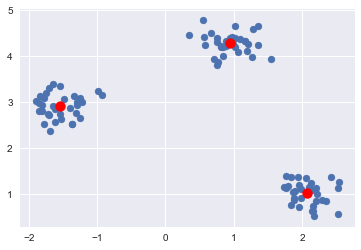

In [224]:
centroids = choose_centroids(points, 3)
closest = closest_centroid(points, centroids)
for i in range(2):
    centroids = update_centroids(points, closest, centroids)

plt.scatter(points.iloc[:, 0], points.iloc[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)